# Relativistic Kinematics

## Introduction

Relativistic kinematics describes the motion of particles when their velocities approach the speed of light $c$. At such speeds, Newtonian mechanics breaks down, and we must use Einstein's Special Theory of Relativity (1905) to accurately describe physical phenomena.

## Fundamental Concepts

### The Lorentz Factor

The cornerstone of relativistic kinematics is the **Lorentz factor** $\gamma$, defined as:

$$\gamma = \frac{1}{\sqrt{1 - \beta^2}} = \frac{1}{\sqrt{1 - v^2/c^2}}$$

where $\beta = v/c$ is the velocity as a fraction of the speed of light.

Key properties:
- $\gamma = 1$ when $v = 0$
- $\gamma \to \infty$ as $v \to c$
- $\gamma > 1$ for all non-zero velocities

### Time Dilation

A clock moving relative to an observer runs slower by a factor of $\gamma$:

$$\Delta t = \gamma \Delta t_0$$

where $\Delta t_0$ is the proper time (time measured in the rest frame of the clock).

### Length Contraction

Objects moving relative to an observer appear contracted along the direction of motion:

$$L = \frac{L_0}{\gamma}$$

where $L_0$ is the proper length (length measured in the rest frame of the object).

### Relativistic Momentum

The relativistic momentum is given by:

$$\vec{p} = \gamma m_0 \vec{v}$$

where $m_0$ is the rest mass. Note that momentum increases without bound as $v \to c$.

### Relativistic Energy

The total relativistic energy is:

$$E = \gamma m_0 c^2$$

This can be decomposed into rest energy and kinetic energy:

$$E = m_0 c^2 + K$$

where the relativistic kinetic energy is:

$$K = (\gamma - 1) m_0 c^2$$

### Energy-Momentum Relation

The fundamental invariant relation connecting energy and momentum:

$$E^2 = (pc)^2 + (m_0 c^2)^2$$

This is the relativistic dispersion relation, forming a hyperbola in $(E, pc)$ space.

### Velocity Addition

When combining velocities in special relativity, we must use the relativistic velocity addition formula:

$$u = \frac{v + w}{1 + vw/c^2}$$

This ensures that no combined velocity can exceed $c$.

## Four-Vectors

Relativistic kinematics is elegantly expressed using four-vectors. The **four-momentum** is:

$$p^\mu = (E/c, p_x, p_y, p_z)$$

with invariant norm:

$$p^\mu p_\mu = -m_0^2 c^2$$

(using the metric signature $(-,+,+,+)$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up matplotlib for publication-quality figures
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9,
    'figure.figsize': (12, 10),
    'figure.dpi': 100
})

# Physical constants (natural units where c = 1 for calculations)
c = 1.0  # Speed of light

def lorentz_factor(beta):
    """Calculate the Lorentz factor gamma for a given beta = v/c."""
    return 1.0 / np.sqrt(1.0 - beta**2)

def relativistic_momentum(m0, beta):
    """Calculate relativistic momentum p = gamma * m0 * v."""
    gamma = lorentz_factor(beta)
    return gamma * m0 * beta * c

def relativistic_energy(m0, beta):
    """Calculate total relativistic energy E = gamma * m0 * c^2."""
    gamma = lorentz_factor(beta)
    return gamma * m0 * c**2

def kinetic_energy(m0, beta):
    """Calculate relativistic kinetic energy K = (gamma - 1) * m0 * c^2."""
    gamma = lorentz_factor(beta)
    return (gamma - 1) * m0 * c**2

def classical_kinetic_energy(m0, beta):
    """Calculate classical kinetic energy K = 0.5 * m0 * v^2."""
    v = beta * c
    return 0.5 * m0 * v**2

def classical_momentum(m0, beta):
    """Calculate classical momentum p = m0 * v."""
    return m0 * beta * c

def velocity_addition(v, w):
    """Relativistic velocity addition formula."""
    return (v + w) / (1 + v * w / c**2)

def time_dilation(proper_time, beta):
    """Calculate dilated time."""
    gamma = lorentz_factor(beta)
    return gamma * proper_time

def length_contraction(proper_length, beta):
    """Calculate contracted length."""
    gamma = lorentz_factor(beta)
    return proper_length / gamma

/tmp/ipykernel_160792/3806711033.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


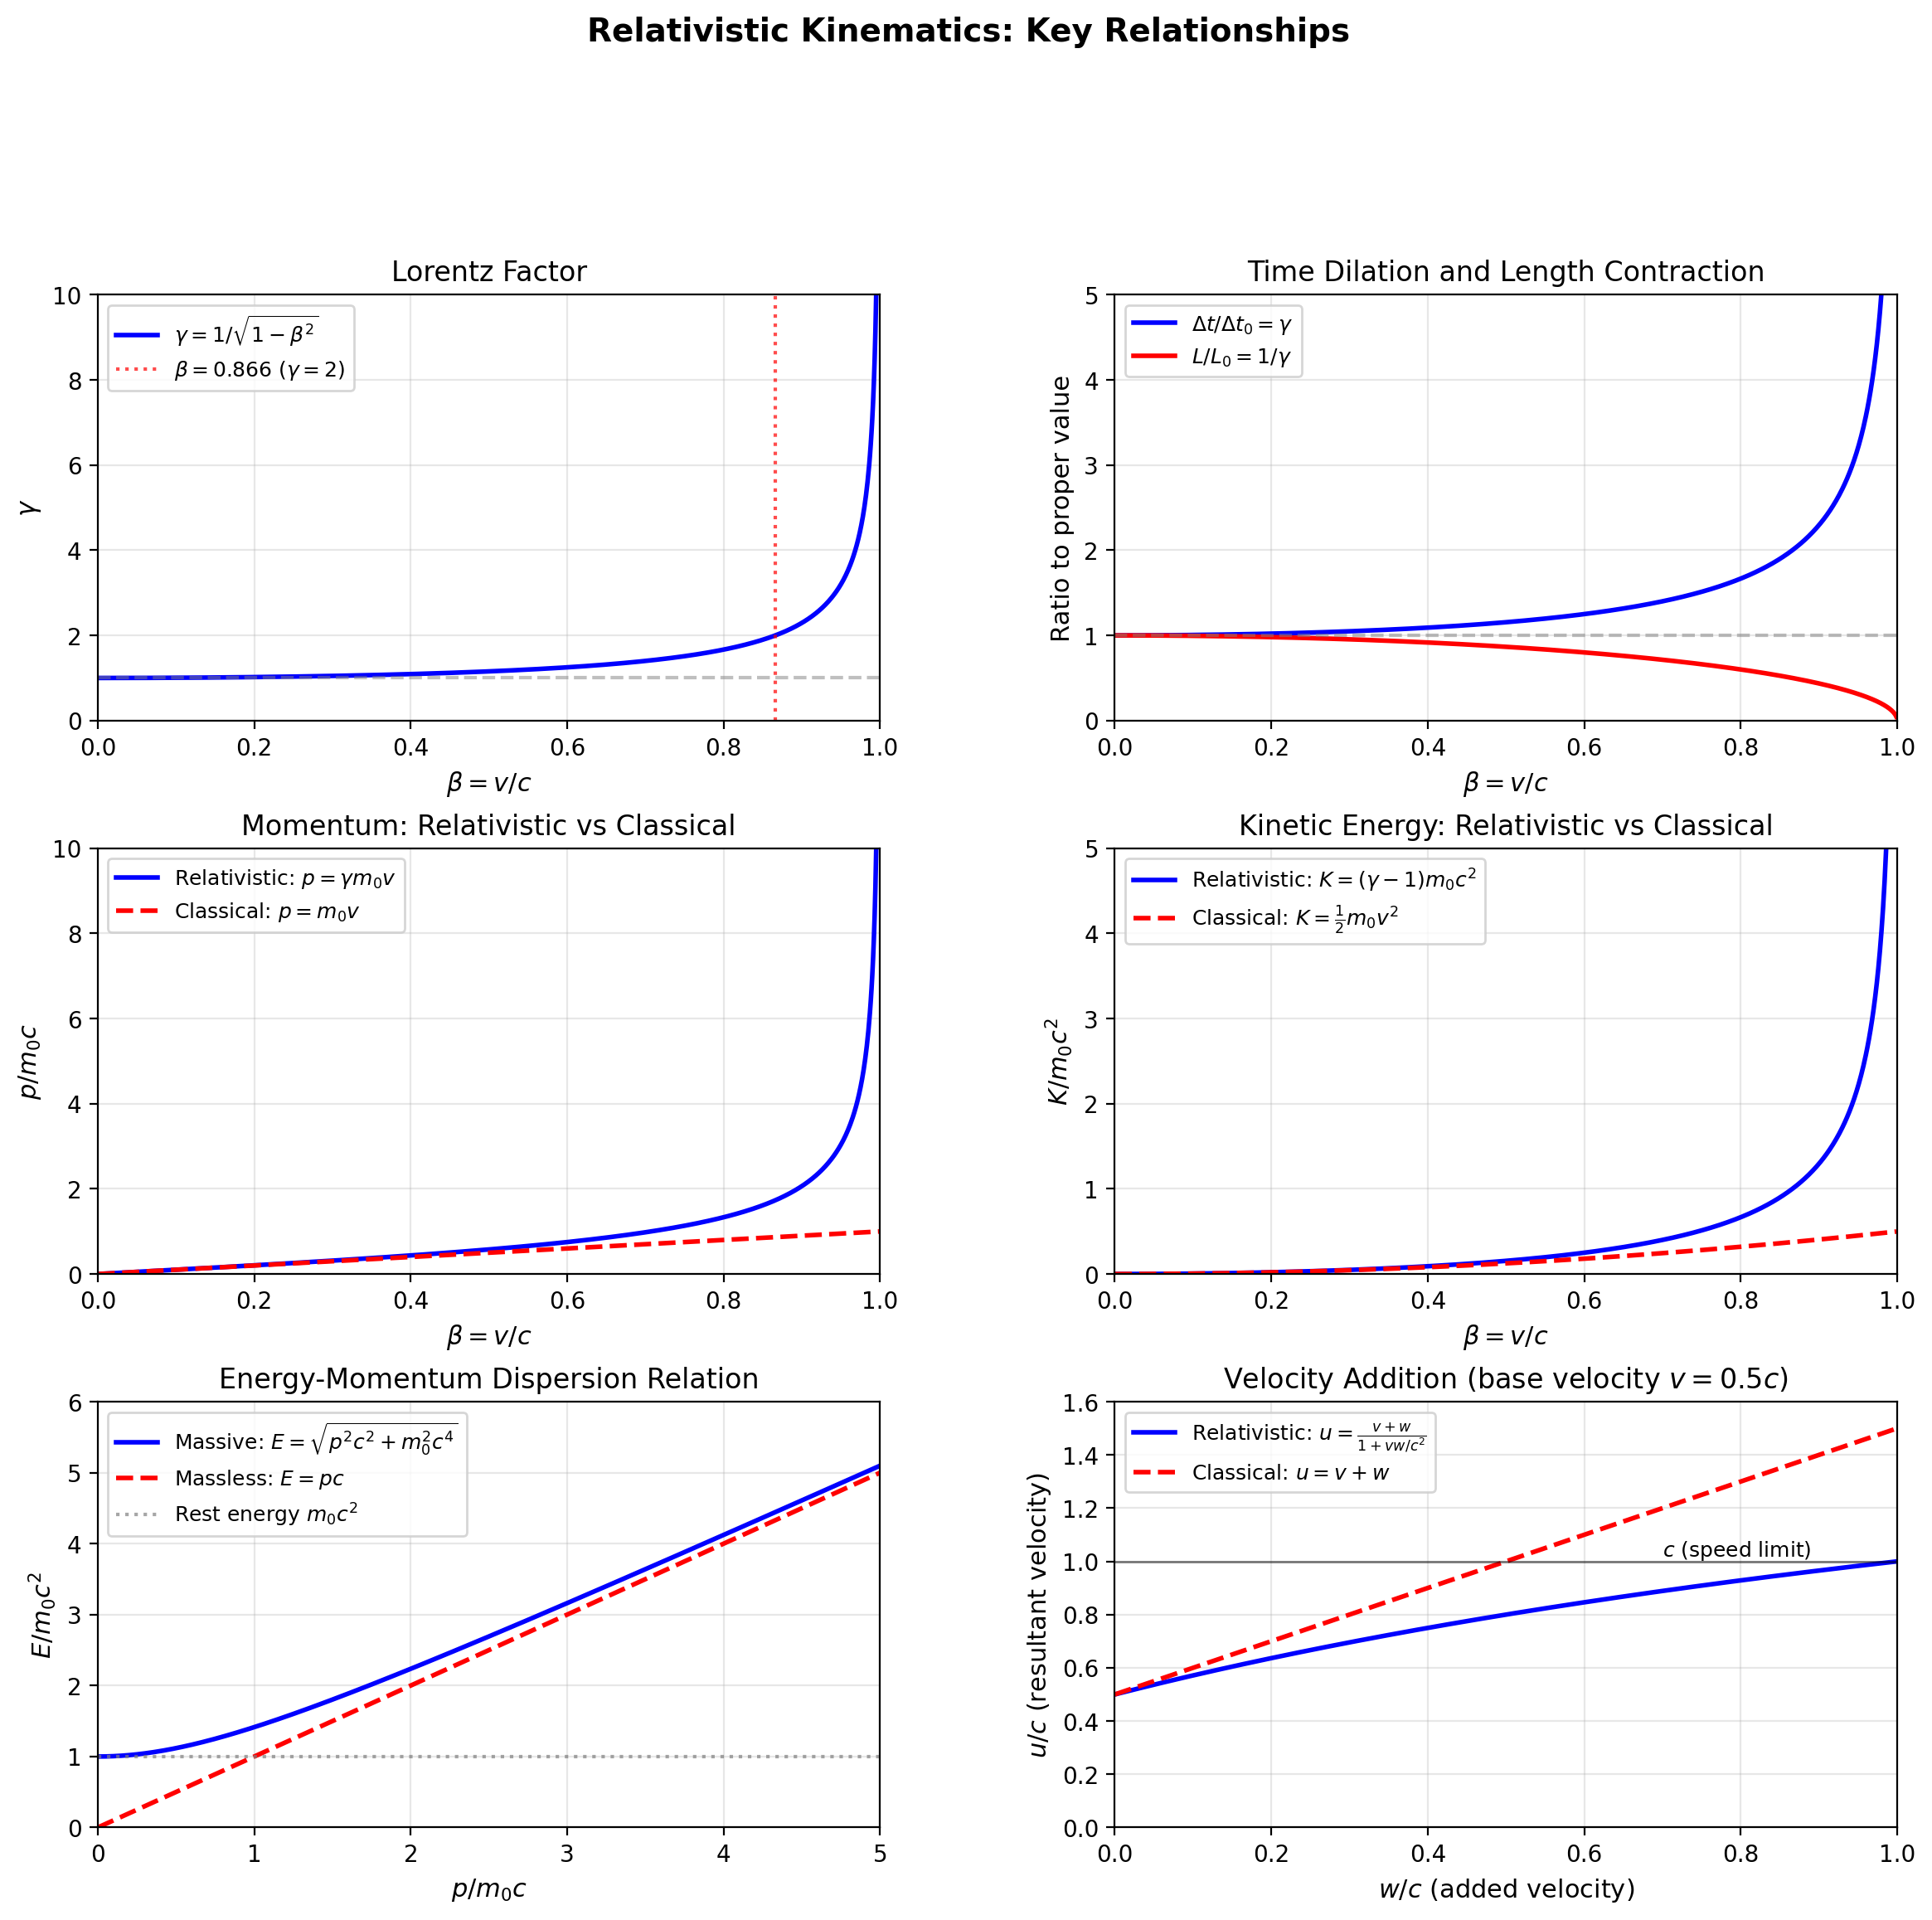

Figure saved as 'plot.png'


In [2]:
# Create a comprehensive figure with multiple subplots
fig = plt.figure(figsize=(14, 12))
gs = GridSpec(3, 2, figure=fig, hspace=0.3, wspace=0.3)

# Beta values for plotting (avoid exactly 1 to prevent division by zero)
beta = np.linspace(0, 0.999, 1000)

# Rest mass for calculations (arbitrary units)
m0 = 1.0

# ============================================
# Plot 1: Lorentz Factor vs Velocity
# ============================================
ax1 = fig.add_subplot(gs[0, 0])
gamma = lorentz_factor(beta)
ax1.plot(beta, gamma, 'b-', linewidth=2, label=r'$\gamma = 1/\sqrt{1-\beta^2}$')
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0.866, color='r', linestyle=':', alpha=0.7, label=r'$\beta = 0.866$ ($\gamma = 2$)')
ax1.set_xlabel(r'$\beta = v/c$')
ax1.set_ylabel(r'$\gamma$')
ax1.set_title('Lorentz Factor')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 10)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# ============================================
# Plot 2: Time Dilation and Length Contraction
# ============================================
ax2 = fig.add_subplot(gs[0, 1])
proper_time = 1.0
proper_length = 1.0
dilated_time = time_dilation(proper_time, beta)
contracted_length = length_contraction(proper_length, beta)

ax2.plot(beta, dilated_time, 'b-', linewidth=2, label=r'$\Delta t / \Delta t_0 = \gamma$')
ax2.plot(beta, contracted_length, 'r-', linewidth=2, label=r'$L / L_0 = 1/\gamma$')
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax2.set_xlabel(r'$\beta = v/c$')
ax2.set_ylabel('Ratio to proper value')
ax2.set_title('Time Dilation and Length Contraction')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 5)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# ============================================
# Plot 3: Relativistic vs Classical Momentum
# ============================================
ax3 = fig.add_subplot(gs[1, 0])
p_rel = relativistic_momentum(m0, beta)
p_class = classical_momentum(m0, beta)

ax3.plot(beta, p_rel, 'b-', linewidth=2, label=r'Relativistic: $p = \gamma m_0 v$')
ax3.plot(beta, p_class, 'r--', linewidth=2, label=r'Classical: $p = m_0 v$')
ax3.set_xlabel(r'$\beta = v/c$')
ax3.set_ylabel(r'$p / m_0 c$')
ax3.set_title('Momentum: Relativistic vs Classical')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 10)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

# ============================================
# Plot 4: Relativistic vs Classical Kinetic Energy
# ============================================
ax4 = fig.add_subplot(gs[1, 1])
K_rel = kinetic_energy(m0, beta)
K_class = classical_kinetic_energy(m0, beta)

ax4.plot(beta, K_rel, 'b-', linewidth=2, label=r'Relativistic: $K = (\gamma - 1) m_0 c^2$')
ax4.plot(beta, K_class, 'r--', linewidth=2, label=r'Classical: $K = \frac{1}{2} m_0 v^2$')
ax4.set_xlabel(r'$\beta = v/c$')
ax4.set_ylabel(r'$K / m_0 c^2$')
ax4.set_title('Kinetic Energy: Relativistic vs Classical')
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 5)
ax4.legend(loc='upper left')
ax4.grid(True, alpha=0.3)

# ============================================
# Plot 5: Energy-Momentum Relation
# ============================================
ax5 = fig.add_subplot(gs[2, 0])

# For a massive particle (m0 = 1)
p_values = np.linspace(0, 5, 500)
E_massive = np.sqrt(p_values**2 + m0**2)  # E^2 = p^2 + m0^2 (c=1)

# For a massless particle (photon)
E_massless = p_values  # E = |p| for photons

ax5.plot(p_values, E_massive, 'b-', linewidth=2, label=r'Massive: $E = \sqrt{p^2c^2 + m_0^2c^4}$')
ax5.plot(p_values, E_massless, 'r--', linewidth=2, label=r'Massless: $E = pc$')
ax5.axhline(y=m0, color='gray', linestyle=':', alpha=0.7, label=r'Rest energy $m_0c^2$')
ax5.set_xlabel(r'$p / m_0 c$')
ax5.set_ylabel(r'$E / m_0 c^2$')
ax5.set_title('Energy-Momentum Dispersion Relation')
ax5.set_xlim(0, 5)
ax5.set_ylim(0, 6)
ax5.legend(loc='upper left')
ax5.grid(True, alpha=0.3)

# ============================================
# Plot 6: Relativistic Velocity Addition
# ============================================
ax6 = fig.add_subplot(gs[2, 1])

# Base velocity
v_base = 0.5 * c  # 0.5c
w_values = np.linspace(0, 0.999, 500)

# Relativistic addition
u_relativistic = velocity_addition(v_base, w_values * c) / c

# Classical addition (would exceed c)
u_classical = (v_base + w_values * c) / c

ax6.plot(w_values, u_relativistic, 'b-', linewidth=2, 
         label=r'Relativistic: $u = \frac{v+w}{1+vw/c^2}$')
ax6.plot(w_values, u_classical, 'r--', linewidth=2, 
         label=r'Classical: $u = v + w$')
ax6.axhline(y=1, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax6.text(0.7, 1.02, r'$c$ (speed limit)', fontsize=9)
ax6.set_xlabel(r'$w/c$ (added velocity)')
ax6.set_ylabel(r'$u/c$ (resultant velocity)')
ax6.set_title(f'Velocity Addition (base velocity $v = 0.5c$)')
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1.6)
ax6.legend(loc='upper left')
ax6.grid(True, alpha=0.3)

plt.suptitle('Relativistic Kinematics: Key Relationships', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig('relativistic_kinematics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved as 'plot.png'")

In [3]:
# Numerical examples and verification
print("="*60)
print("NUMERICAL EXAMPLES: RELATIVISTIC KINEMATICS")
print("="*60)

# Example 1: Electron at various speeds
print("\n1. Lorentz Factor at Various Speeds:")
print("-" * 40)
velocities = [0.1, 0.5, 0.9, 0.99, 0.999]
for v in velocities:
    gamma = lorentz_factor(v)
    print(f"   β = {v:.3f} → γ = {gamma:.4f}")

# Example 2: Time dilation for a muon
print("\n2. Muon Lifetime (Time Dilation Example):")
print("-" * 40)
proper_lifetime = 2.2e-6  # seconds
muon_beta = 0.9994  # typical cosmic ray muon
dilated_lifetime = time_dilation(proper_lifetime, muon_beta)
gamma_muon = lorentz_factor(muon_beta)
print(f"   Proper lifetime: {proper_lifetime*1e6:.2f} μs")
print(f"   Muon speed: β = {muon_beta}")
print(f"   Lorentz factor: γ = {gamma_muon:.2f}")
print(f"   Dilated lifetime: {dilated_lifetime*1e6:.2f} μs")

# Example 3: Relativistic momentum
print("\n3. Momentum Comparison at β = 0.9:")
print("-" * 40)
beta_test = 0.9
p_rel_test = relativistic_momentum(m0, beta_test)
p_class_test = classical_momentum(m0, beta_test)
ratio = p_rel_test / p_class_test
print(f"   Relativistic momentum: {p_rel_test:.4f} m₀c")
print(f"   Classical momentum: {p_class_test:.4f} m₀c")
print(f"   Ratio (rel/class): {ratio:.4f}")

# Example 4: Energy-momentum verification
print("\n4. Energy-Momentum Relation Verification (β = 0.8):")
print("-" * 40)
beta_verify = 0.8
E = relativistic_energy(m0, beta_verify)
p = relativistic_momentum(m0, beta_verify)
E_from_relation = np.sqrt(p**2 + m0**2)  # E² = p² + m₀² (c=1)
print(f"   Total energy E: {E:.6f} m₀c²")
print(f"   Momentum p: {p:.6f} m₀c")
print(f"   E from √(p²+m₀²): {E_from_relation:.6f} m₀c²")
print(f"   Verification: {'✓ PASS' if np.isclose(E, E_from_relation) else '✗ FAIL'}")

# Example 5: Velocity addition
print("\n5. Relativistic Velocity Addition:")
print("-" * 40)
v1, v2 = 0.6, 0.7
u_rel = velocity_addition(v1, v2)
u_class = v1 + v2
print(f"   Adding v₁ = {v1}c and v₂ = {v2}c")
print(f"   Relativistic result: u = {u_rel:.6f}c")
print(f"   Classical result: u = {u_class:.6f}c (unphysical if > 1)")
print(f"   Relativistic formula prevents exceeding c: {'✓' if u_rel < 1 else '✗'}")

print("\n" + "="*60)

NUMERICAL EXAMPLES: RELATIVISTIC KINEMATICS

1. Lorentz Factor at Various Speeds:
----------------------------------------
   β = 0.100 → γ = 1.0050
   β = 0.500 → γ = 1.1547
   β = 0.900 → γ = 2.2942
   β = 0.990 → γ = 7.0888
   β = 0.999 → γ = 22.3663

2. Muon Lifetime (Time Dilation Example):
----------------------------------------
   Proper lifetime: 2.20 μs
   Muon speed: β = 0.9994
   Lorentz factor: γ = 28.87
   Dilated lifetime: 63.52 μs

3. Momentum Comparison at β = 0.9:
----------------------------------------
   Relativistic momentum: 2.0647 m₀c
   Classical momentum: 0.9000 m₀c
   Ratio (rel/class): 2.2942

4. Energy-Momentum Relation Verification (β = 0.8):
----------------------------------------
   Total energy E: 1.666667 m₀c²
   Momentum p: 1.333333 m₀c
   E from √(p²+m₀²): 1.666667 m₀c²
   Verification: ✓ PASS

5. Relativistic Velocity Addition:
----------------------------------------
   Adding v₁ = 0.6c and v₂ = 0.7c
   Relativistic result: u = 0.915493c
   Classi

## Summary

This notebook demonstrated the key concepts of relativistic kinematics:

1. **Lorentz Factor**: The fundamental scaling factor $\gamma$ that determines all relativistic effects

2. **Time Dilation**: Moving clocks run slower by factor $\gamma$

3. **Length Contraction**: Moving objects appear shorter by factor $1/\gamma$

4. **Relativistic Momentum**: $p = \gamma m_0 v$ diverges as $v \to c$

5. **Energy-Momentum Relation**: The invariant $E^2 = (pc)^2 + (m_0c^2)^2$

6. **Velocity Addition**: The relativistic formula ensures no velocity exceeds $c$

### Applications

Relativistic kinematics is essential for:
- Particle accelerator physics (LHC, etc.)
- Cosmic ray physics
- GPS satellite corrections
- High-energy astrophysics
- Nuclear and particle physics experiments

### References

1. Einstein, A. (1905). "On the Electrodynamics of Moving Bodies." *Annalen der Physik*, 17, 891-921.
2. Taylor, E.F. & Wheeler, J.A. (1992). *Spacetime Physics*. W.H. Freeman.
3. Rindler, W. (2006). *Relativity: Special, General, and Cosmological*. Oxford University Press.